In [1]:
import numpy as np, pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from tramp.experiments import run_experiments, qplot

## Gradient checking

In [3]:
from tramp.experiments import run_experiments, qplot
from tramp.priors import get_prior
jdjdjfkfkfkgkgkg
jsjsjdkfkfkfksjsjdhf
sjsjdjjd jdjdjf fjf fjfjfjfjf 

In [4]:
def compare(prior_type, ax, bx):
    prior = get_prior(size=1, prior_type=prior_type)
    rx, vx = prior.compute_forward_posterior(ax, bx)
    A = prior.compute_log_partition(ax, bx)
    return dict(A=A, rx=rx, vx=vx)

def add_grad(df, wrt):
    out = pd.DataFrame()
    for prior_type in df.prior_type.unique():
        check = df[df.prior_type==prior_type].sort_values(by=wrt)
        check["A_prime"] = check["A"].diff() / check[wrt].diff()
        check["A_sec"] = check["A_prime"].shift(-1).diff() / check[wrt].diff()
        out = out.append(check, ignore_index=True, sort=False)
    return out

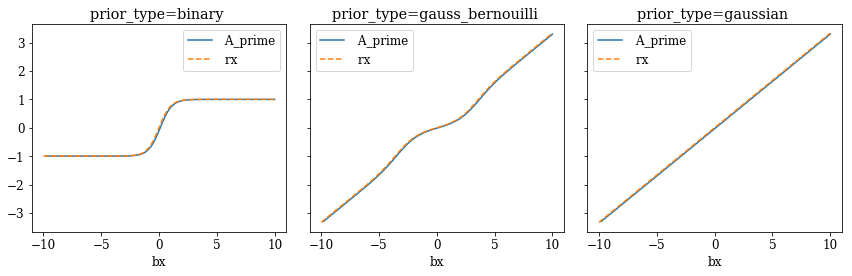

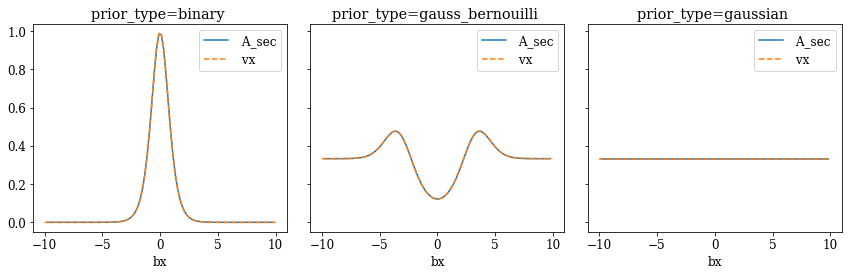

In [5]:
wrt_bx = run_experiments(
    compare, prior_type=["gaussian", "gauss_bernouilli","binary"], 
    ax=2, bx=np.linspace(-10, 10, 100)
)
wrt_bx = add_grad(wrt_bx, wrt="bx")
qplot(
    wrt_bx, x="bx", y=["A_prime", "rx"], column="prior_type", 
    y_markers=["-", "--"], y_legend=True
)
qplot(
    wrt_bx, x="bx", y=["A_sec", "vx"], column="prior_type", 
    y_markers=["-", "--"], y_legend=True
)

## Check high dimesional limit

In [11]:
from check_highdim import check_highdim

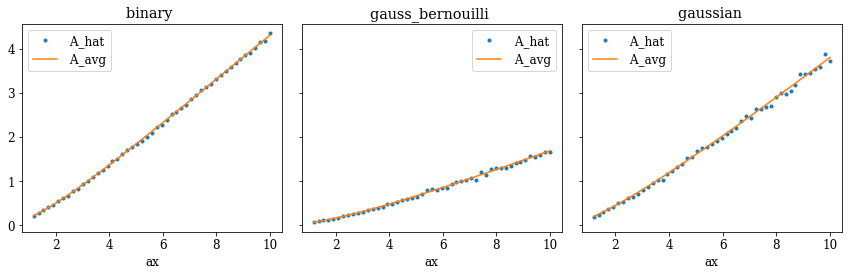

In [14]:
import pandas as pd
df = pd.read_csv("check_highdim.csv")
qplot(
    df, x="ax", y=["A_hat", "A_avg"], column="prior_type",
    y_markers=[".", "-"], y_legend=True, rename={"prior_type=":""}
)

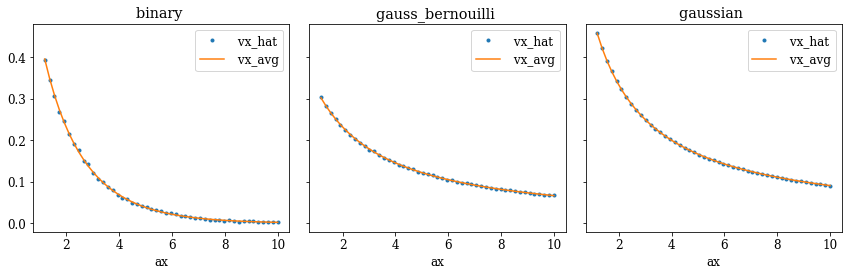

In [15]:
qplot(
    df, x="ax", y=["vx_hat", "vx_avg"],  column="prior_type", 
    y_markers=[".", "-"], y_legend=True, rename={"prior_type=":""}
)

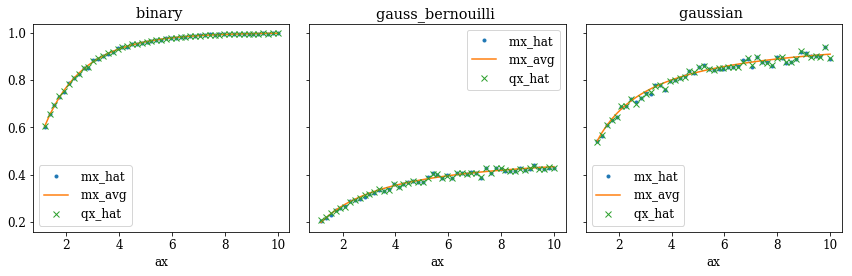

In [16]:
qplot(
    df, x="ax", y=["mx_hat", "mx_avg", "qx_hat"], column="prior_type", 
    y_markers=[".", "-", "x"], y_legend=True, rename={"prior_type=":""}
)

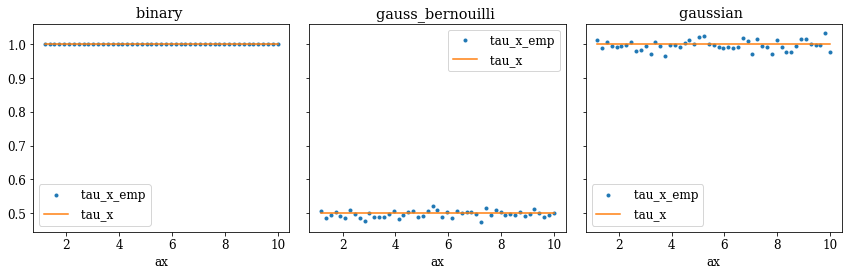

In [17]:
qplot(
    df, x="ax",  y=["tau_x_emp", "tau_x"], column="prior_type", 
    y_markers=[".", "-"], y_legend=True, rename={"prior_type=":""}
)

## Check high dim one instance

mse_x 0.06057930941232273 0.06057930941232259 0.06677966385249683
mx 0.5491565714224815 0.5430582763291549 0.43322033614750316
A 2.2560498515518495 169.03944700624734


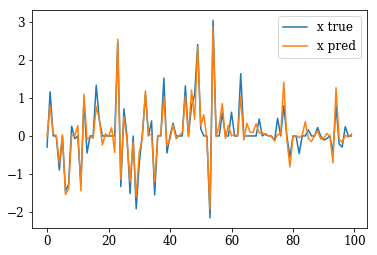

In [18]:
d = check_highdim(prior_type="gauss_bernouilli", N=100, ax=10, plot=True)
d={key:d[key] for key in sorted(d.keys())}
print("mse_x", d["mse_x"], d["qx_hat"]-2*d["mx_hat"]+d["tau_x_emp"], d["vx_avg"])
print("mx", d["mx_hat"], d["qx_hat"], d["mx_avg"])
print("A", d["A_hat"], d["A_avg"])

mse_x 6.009198893797384e-09 6.0091984721566405e-09 0.0024113147354122835
mx 0.9999861087950389 0.9999722235992763 0.9975886852645878
A 4.639746745179299 4.309101161548426


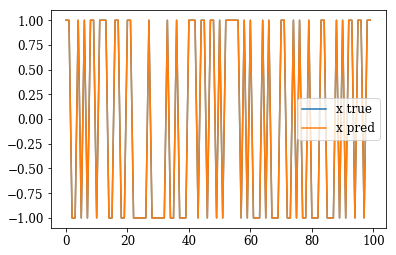

In [19]:
d = check_highdim(prior_type="binary", N=100, ax=10, plot=True)
d={key:d[key] for key in sorted(d.keys())}
d={key:d[key] for key in sorted(d.keys())}
print("mse_x", d["mse_x"], d["qx_hat"]-2*d["mx_hat"]+d["tau_x_emp"], d["vx_avg"])
print("mx", d["mx_hat"], d["qx_hat"], d["mx_avg"])
print("A", d["A_hat"], d["A_avg"])